# Pandas의 시각화 기능

Pandas의 시리즈나 데이터프레임은 `plot`이라는 시각화 메서드를 내장하고 있다. `plot`은 matplotlib를 내부에서 임포트하여 사용한다. 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Malgun Gothic']
plt.rcParams['axes.unicode_minus'] =False
import numpy as np
import matplotlib.pyplot as plt

In [31]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(10000, 3),
                   index=pd.date_range('1/1/2026', periods=10000),
                   columns=['A', 'B', 'C'])
df1

,A,B,C
2026-01-01,1.764052,0.400157,0.978738
2026-01-02,2.240893,1.867558,-0.977278
2026-01-03,0.950088,-0.151357,-0.103219
2026-01-04,0.410599,0.144044,1.454274
2026-01-05,0.761038,0.121675,0.443863
...,...,...,...
2053-05-14,-0.303895,0.213129,0.046172
2053-05-15,1.533356,1.910297,0.069245
2053-05-16,1.039309,0.118204,-0.762623
2053-05-17,0.606083,-0.400898,-0.585452


In [33]:
df_cumsum = df1.cumsum()
df_cumsum

,A,B,C
2026-01-01,1.764052,0.400157,0.978738
2026-01-02,4.004946,2.267715,0.001460
2026-01-03,4.955034,2.116358,-0.101759
2026-01-04,5.365632,2.260402,1.352515
2026-01-05,6.126670,2.382077,1.796378
...,...,...,...
2053-05-14,-76.326279,-6.156591,-52.851278
2053-05-15,-74.792923,-4.246294,-52.782033
2053-05-16,-73.753614,-4.128090,-53.544656
2053-05-17,-73.147531,-4.528988,-54.130108


<Axes: >

<Figure size 1000x200 with 0 Axes>

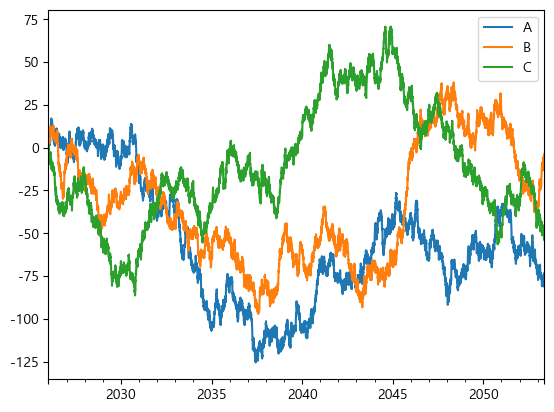

In [34]:
plt.figure(figsize=(10,2))
df_cumsum.plot()

In [11]:
np.random.randn(100,3)

array([[-1.30652685,  1.65813068, -0.11816405],
       [-0.6801782 ,  0.66638308, -0.46071979],
       [-1.33425847, -1.34671751,  0.69377315],
       [-0.15957344, -0.13370156,  1.07774381],
       [-1.12682581, -0.73067775, -0.38487981],
       [ 0.09435159, -0.04217145, -0.28688719],
       [-0.0616264 , -0.10730528, -0.71960439],
       [-0.81299299,  0.27451636, -0.89091508],
       [-1.15735526, -0.31229225, -0.15766702],
       [ 2.2567235 , -0.70470028,  0.94326072],
       [ 0.74718833, -1.18894496,  0.77325298],
       [-1.18388064, -2.65917224,  0.60631952],
       [-1.75589058,  0.45093446, -0.6840109 ],
       [ 1.6595508 ,  1.0685094 , -0.4533858 ],
       [-0.68783761, -1.2140774 , -0.44092263],
       [-0.2803555 , -0.36469354,  0.15670386],
       [ 0.5785215 ,  0.34965446, -0.76414392],
       [-1.43779147,  1.36453185, -0.68944918],
       [-0.6522936 , -0.52118931, -1.84306955],
       [-0.477974  , -0.47965581,  0.6203583 ],
       [ 0.69845715,  0.00377089,  0.931

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터

<Axes: >

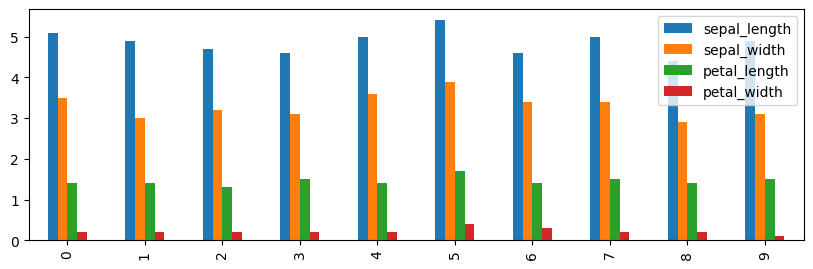

In [3]:
iris[:10].plot(figsize=(10,3), kind='bar')

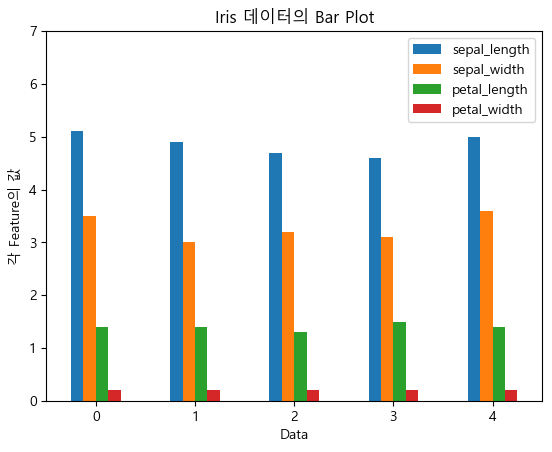

In [12]:
iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show()

`plot` 메서드의 `kind`라는 인수를 바꾸면 여러가지 플롯을 그릴 수 있다. 다음과 같은 인수값을 지원한다.

* `bar`
* `pie`
* `hist`
* `kde`
* `box`
* `scatter`
* `area`


`kind` 인수에 문자열을 쓰는 대신 `plot.bar`처럼 직접 메서드로 사용할 수도 있다.

다음은 그룹분석으로 각 붓꽃종의 특징값의 평균을 구한 것이다.

In [13]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = "feature"  # in-place method
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [15]:
df2.T

species,setosa,versicolor,virginica
feature,,,
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


그룹분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

전치연산으로 시각화 방법을 다르게 할 수도 있다.

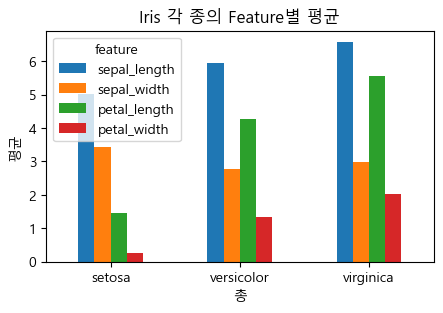

In [14]:
df2.plot.bar(rot=0, figsize=(5,3))
plt.title('Iris 각 종의 Feature별 평균')
plt.xlabel('총')
plt.ylabel('평균')
plt.show()

다음은 ``pie``,  ``hist``, ``kde``, ``box``, ``scatter`` 플롯 예제이다.

In [17]:
df3 = titanic['class'].value_counts()
df3

class
Third     491
First     216
Second    184
Name: count, dtype: int64

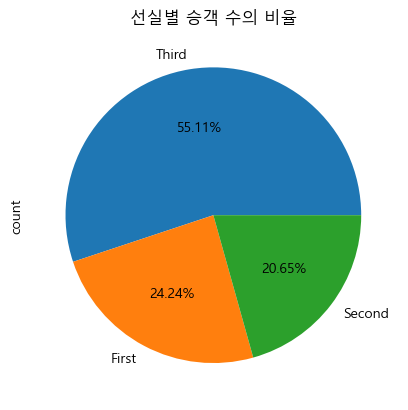

In [22]:
df3.plot.pie(autopct="%.2f%%")
plt.title("선실별 승객 수의 비율")
plt.show()

In [ ]:
df3.plot

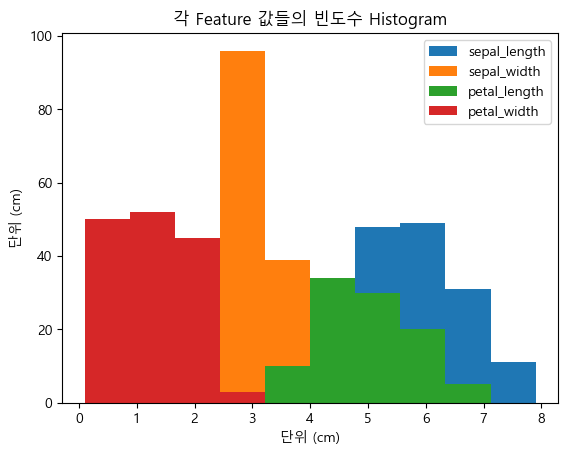

In [24]:
iris.plot.hist()
plt.title('각 Feature 값들의 빈도수 Histogram')
plt.xlabel("단위 (cm)")
plt.ylabel("단위 (cm)")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 `boxplot` 명령이 별도로 있다.

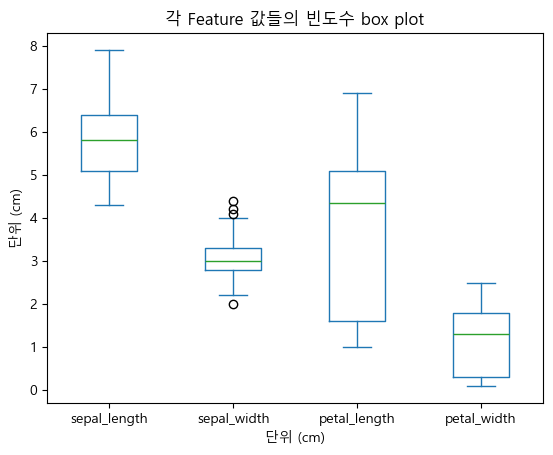

In [25]:
iris.plot.box()
plt.title('각 Feature 값들의 빈도수 box plot')
plt.xlabel("단위 (cm)")
plt.ylabel("단위 (cm)")
plt.show()

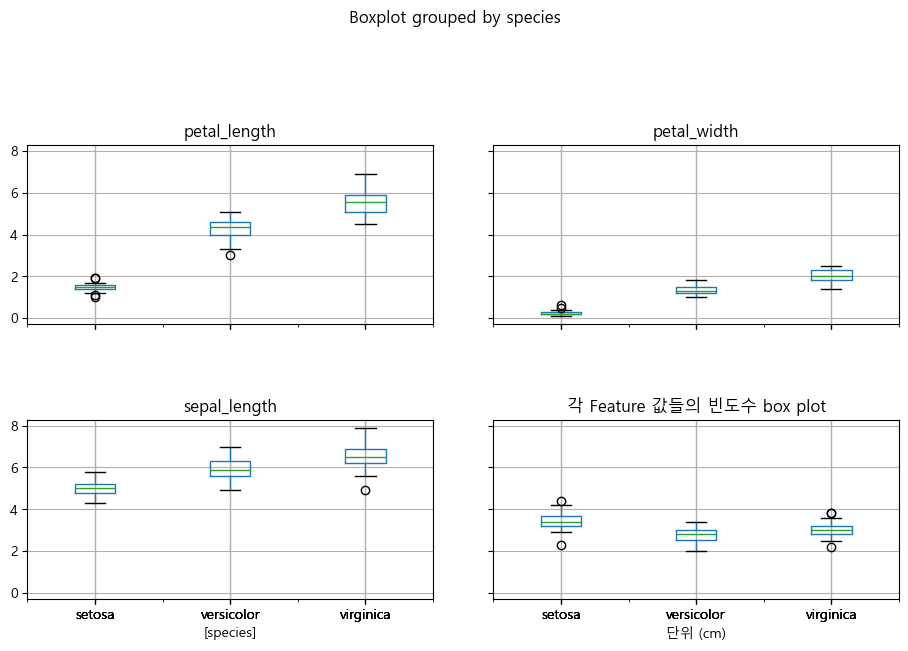

In [31]:
iris.boxplot(by='species',figsize=(10,7))
plt.tight_layout(pad=4, h_pad=5)
plt.title('각 Feature 값들의 빈도수 box plot')
plt.xlabel("단위 (cm)")
plt.ylabel("단위 (cm)")
plt.show()